# Exploratory Data Analysis (EDA) - Insurance Risk Analytics

This notebook explores the historical insurance claim data to understand risk patterns and profitability across different segments such as Province, VehicleType, and Gender.

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='\t')  
print(df.columns)


Index(['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims'], dtype='object')


In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')
print(df.columns)


C:\Users\metya\AppData\Local\Temp\ipykernel_19352\3199809535.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [3]:
import pandas as pd

df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

print(df.info())
print(df.isnull().mean())


C:\Users\metya\AppData\Local\Temp\ipykernel_19352\2032206118.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [4]:
# Converting relevant columns to categorical
categorical_cols = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank',
    'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
    'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt',
    'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory',
    'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [5]:
# Drop columns with >70% missing values
threshold = 0.7
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

print(f"Dropping columns due to high missingness: {cols_to_drop}")

df = df.drop(columns=cols_to_drop)


Dropping columns due to high missingness: ['CustomValueEstimate', 'CrossBorder', 'NumberOfVehiclesInFleet']


In [6]:
# Summary statistics for key financial variables
financial_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']
existing_cols = [col for col in financial_cols if col in df.columns]
print(df[existing_cols].describe())


       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04


In [7]:
# Filter out negative premiums/claims
df = df[(df['TotalPremium'] >= 0) & (df['TotalClaims'] >= 0)]

# Log-transform skewed variables
import numpy as np
df['LogTotalPremium'] = np.log1p(df['TotalPremium'])
df['LogTotalClaims'] = np.log1p(df['TotalClaims'])


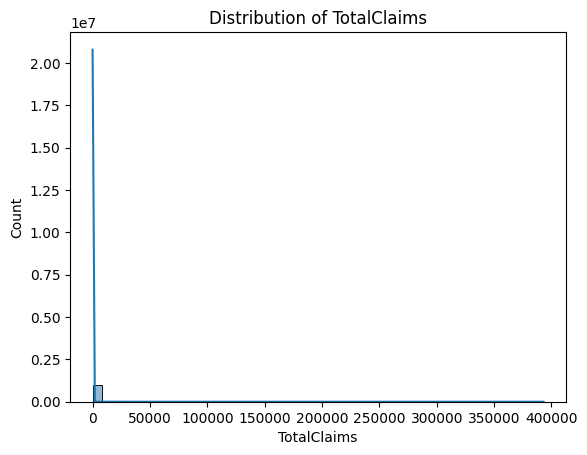

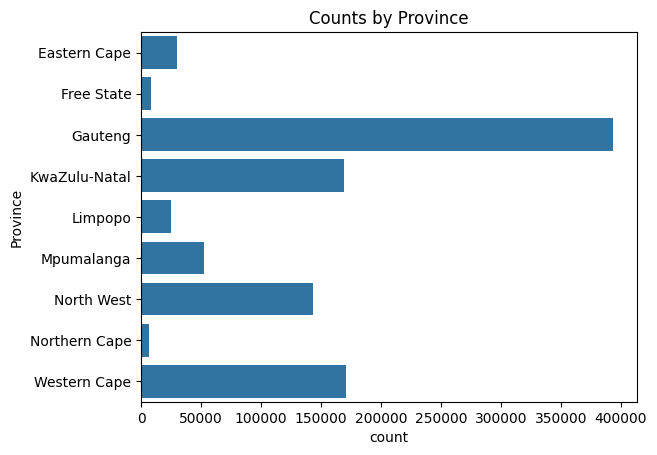

In [8]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.show()

sns.countplot(y='Province', data=df)
plt.title('Counts by Province')
plt.show()


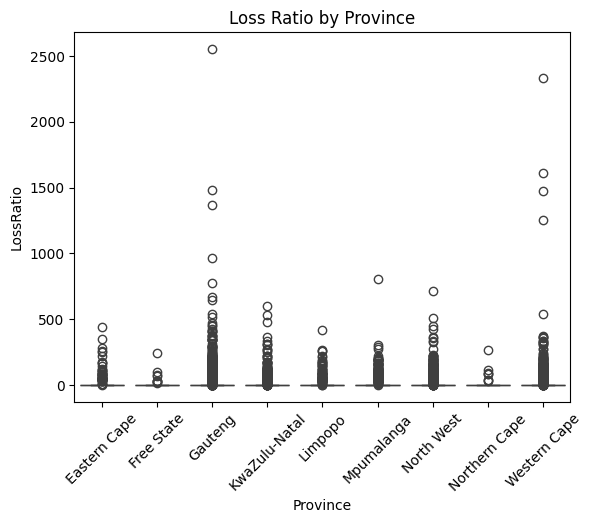

In [9]:
# Bivariate / Multivariate Analysis

df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

sns.boxplot(x='Province', y='LossRatio', data=df)
plt.xticks(rotation=45)
plt.title('Loss Ratio by Province')
plt.show()


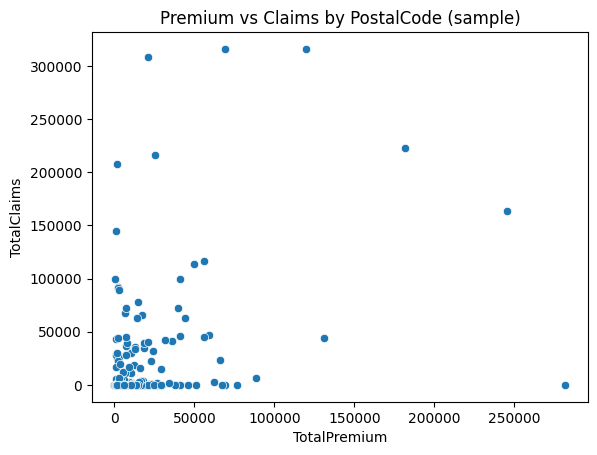

In [10]:
# Correlations between monthly TotalPremium and TotalClaims by PostalCode
monthly_zip = df.groupby(['TransactionMonth', 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()

sns.scatterplot(x='TotalPremium', y='TotalClaims', data=monthly_zip.sample(1000))
plt.title('Premium vs Claims by PostalCode (sample)')
plt.show()


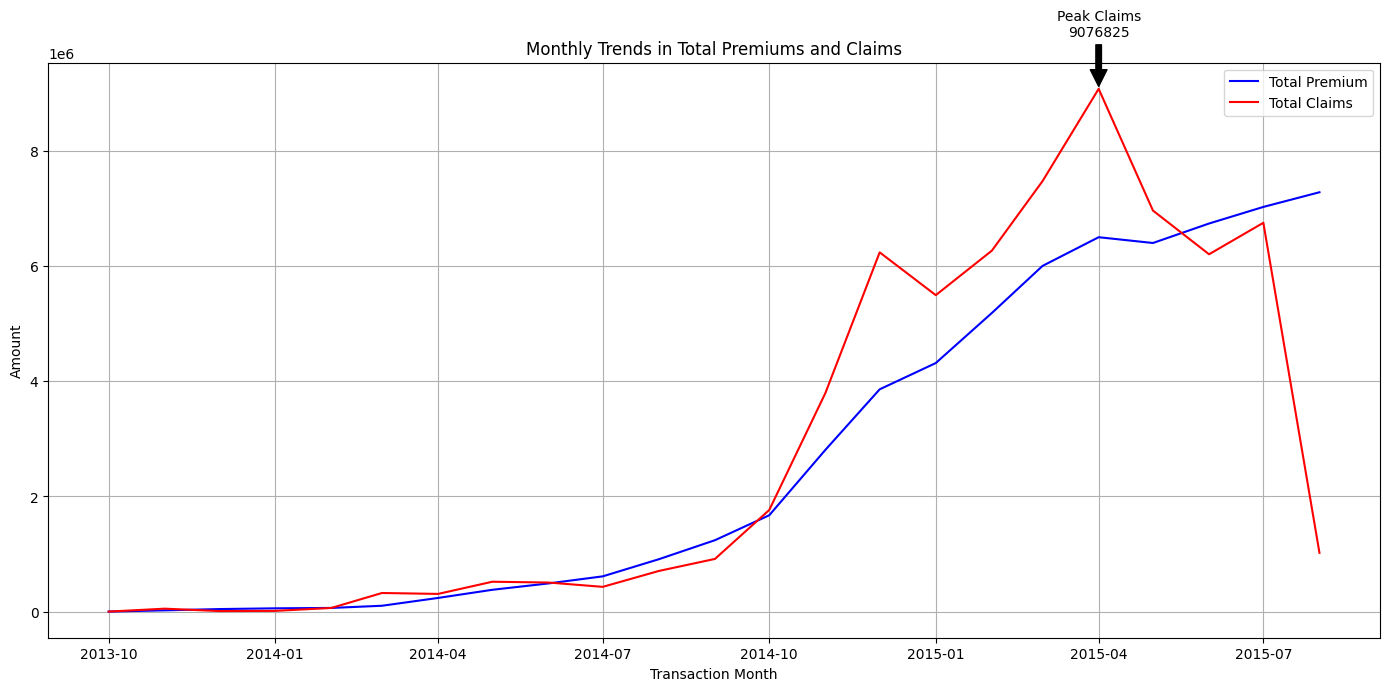

In [11]:
#  Temporal Trend of Claims vs Premiums with Annotations
#  showing monthly total claims and premiums over time with annotations highlighting key points

monthly_summary = df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(14,7))
plt.plot(monthly_summary['TransactionMonth'], monthly_summary['TotalPremium'], label='Total Premium', color='blue')
plt.plot(monthly_summary['TransactionMonth'], monthly_summary['TotalClaims'], label='Total Claims', color='red')

# Add annotations for peaks or notable points
max_claims = monthly_summary.loc[monthly_summary['TotalClaims'].idxmax()]
plt.annotate(f"Peak Claims\n{max_claims['TotalClaims']:.0f}",
             xy=(max_claims['TransactionMonth'], max_claims['TotalClaims']),
             xytext=(max_claims['TransactionMonth'], max_claims['TotalClaims']*1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

plt.title('Monthly Trends in Total Premiums and Claims')
plt.xlabel('Transaction Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


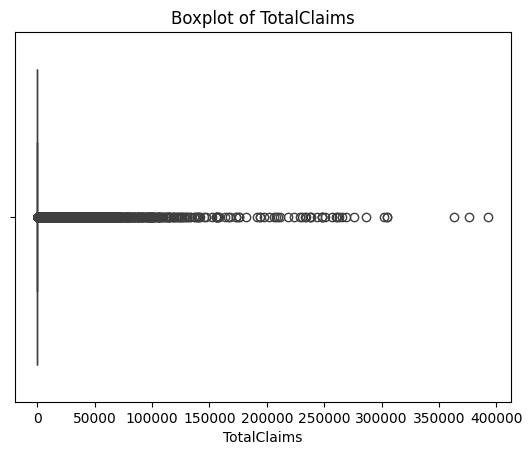

In [12]:
# Outlier Detection
sns.boxplot(x=df['TotalClaims'])
plt.title('Boxplot of TotalClaims')
plt.show()


In [13]:
# Fining vehicle makes/models with highest and lowest average claims.
claims_by_make = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
print("Top 10 makes with highest average claims:\n", claims_by_make.head(10))
print("Top 10 makes with lowest average claims:\n", claims_by_make.tail(10))


Top 10 makes with highest average claims:
 make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
POLARSUN                               134.044800
B.A.W                                  132.934016
FIAT                                   108.625642
BMW                                     90.558050
IVECO                                   89.667017
Name: TotalClaims, dtype: float64
Top 10 makes with lowest average claims:
 make
HINO                                   0.0
JINBEI                                 0.0
LEXUS                                  0.0
PROTON                                 0.0
PEUGEOT                                0.0
OPEL                                   0.0
RENAULT                                0.0
SCANIA                                 0.0
TATA                       

C:\Users\metya\AppData\Local\Temp\ipykernel_19352\2186495291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claims_by_make = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)


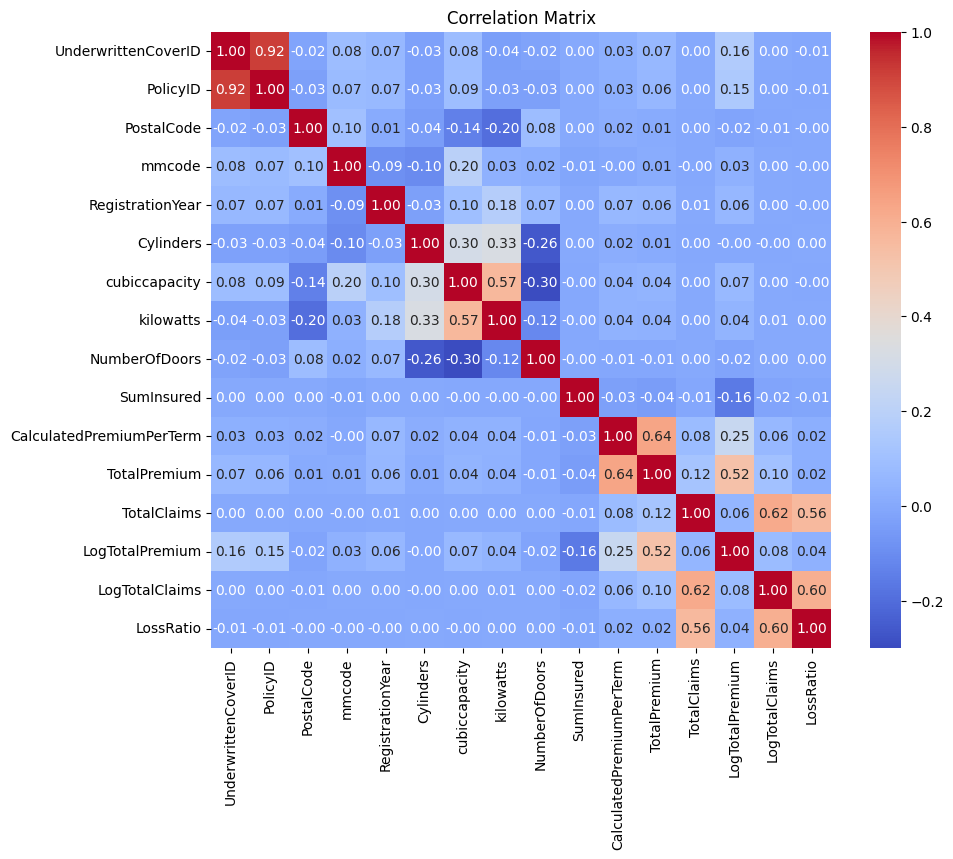

In [14]:
# Correlation Matrix
# Plotting correlation heatmap for numeric variables

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\metya\AppData\Local\Temp\ipykernel_19352\3212010904.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_loss = df.groupby('Province')['LossRatio'].mean().reset_index()
c:\Users\metya\anaconda3\envs\insurance-risk-analytics\Lib\site-packages\numpy\lib\_function_base_impl.py:4669: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


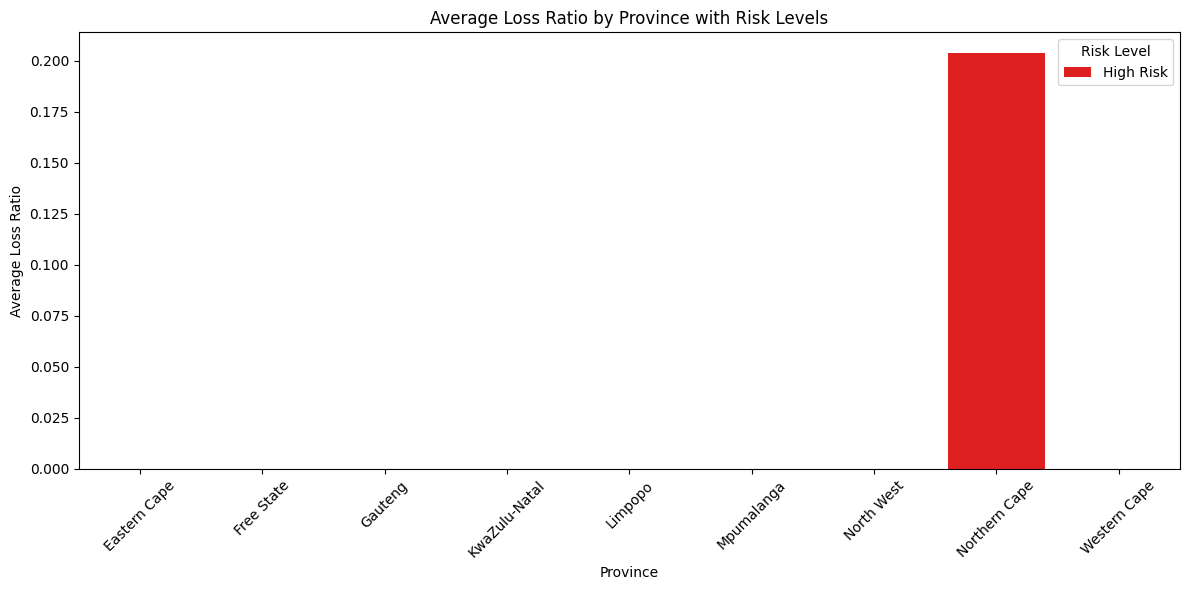

In [15]:
# Loss Ratio by Province with Color Coding by Risk Level
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# df already has LossRatio column: df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Calculate average Loss Ratio by Province
province_loss = df.groupby('Province')['LossRatio'].mean().reset_index()

# Define risk levels based on quantiles
quantiles = province_loss['LossRatio'].quantile([0.33, 0.66]).values
def risk_level(x):
    if x <= quantiles[0]:
        return 'Low Risk'
    elif x <= quantiles[1]:
        return 'Medium Risk'
    else:
        return 'High Risk'

province_loss['RiskLevel'] = province_loss['LossRatio'].apply(risk_level)

# Create a color palette for risk levels
palette = {'Low Risk': 'green', 'Medium Risk': 'orange', 'High Risk': 'red'}

plt.figure(figsize=(12,6))
sns.barplot(data=province_loss.sort_values('LossRatio', ascending=False),
            x='Province', y='LossRatio', hue='RiskLevel', palette=palette)

plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Province with Risk Levels')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Province')
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()


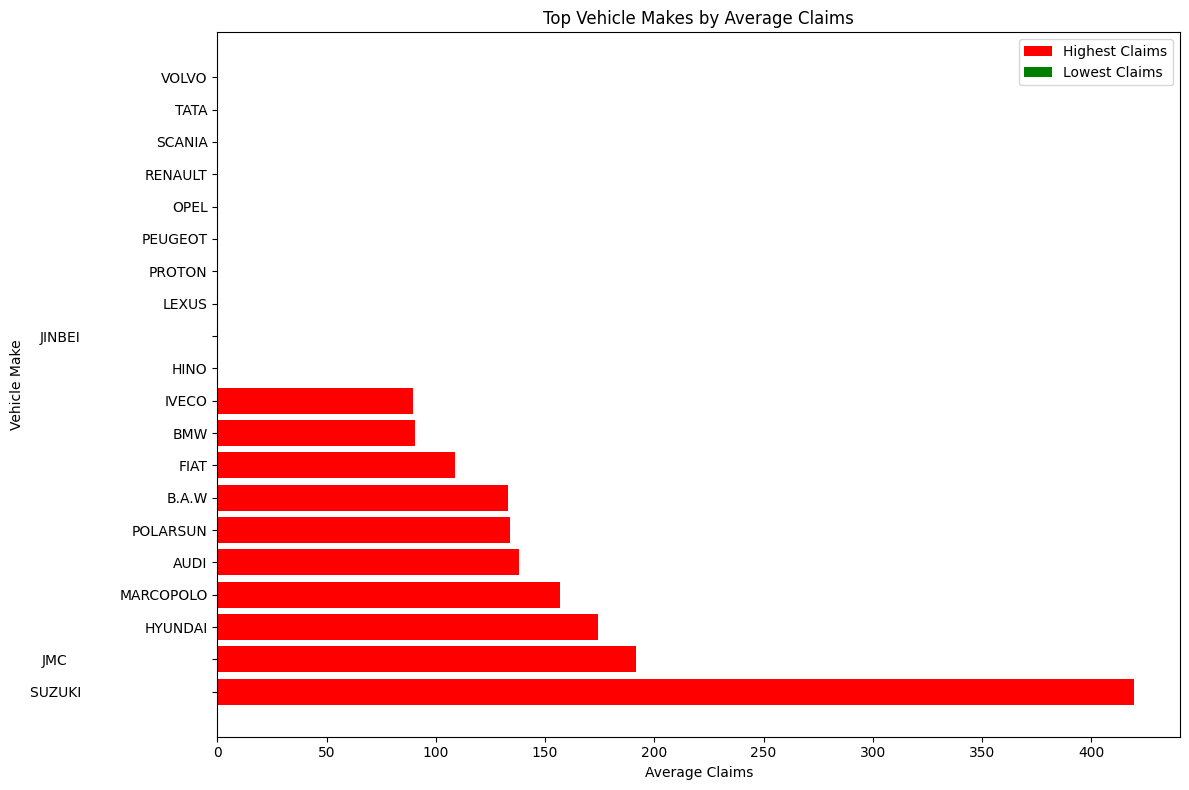

In [16]:
# Vehicle Makes with Highest and Lowest Average Claims
top_makes = claims_by_make.head(10)
low_makes = claims_by_make.tail(10)

plt.figure(figsize=(12, 8))
plt.barh(top_makes.index, top_makes.values, color='red', label='Highest Claims')
plt.barh(low_makes.index, low_makes.values, color='green', label='Lowest Claims')
plt.title('Top Vehicle Makes by Average Claims')
plt.xlabel('Average Claims')
plt.ylabel('Vehicle Make')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\metya\AppData\Local\Temp\ipykernel_19352\4151903552.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10).reset_index()
C:\Users\metya\AppData\Local\Temp\ipykernel_19352\4151903552.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


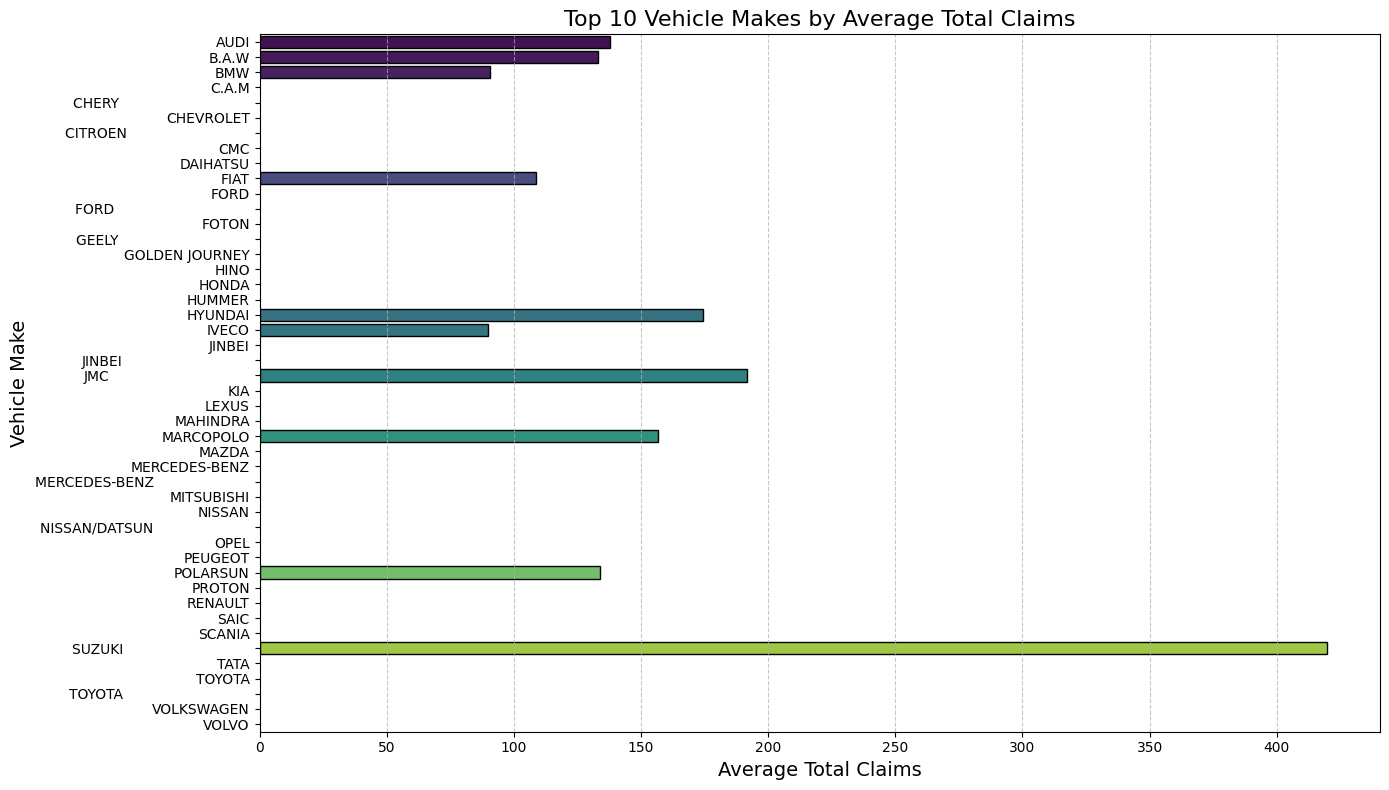

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# top 10 vehicle makes by average total claims
top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14,8))

# horizontal barplot with edge color
barplot = sns.barplot(
    data=top_makes,
    x='TotalClaims',
    y='make',
    palette='viridis',
    edgecolor='black'
)


plt.title('Top 10 Vehicle Makes by Average Total Claims', fontsize=16)
plt.xlabel('Average Total Claims', fontsize=14)
plt.ylabel('Vehicle Make', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
processed_path = '../data/processed/cleaned_task1_insurance_data.csv'
df.to_csv(processed_path, index=False)
